In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

C:\Users\HENRIQUE\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_dsa = pd.read_csv('dados/dataset.csv')
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [3]:
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [4]:
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [5]:
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [6]:
df_dsa[df_dsa['Categoria'] == 'Office Supplies']

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900
...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,10/06/2015,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620


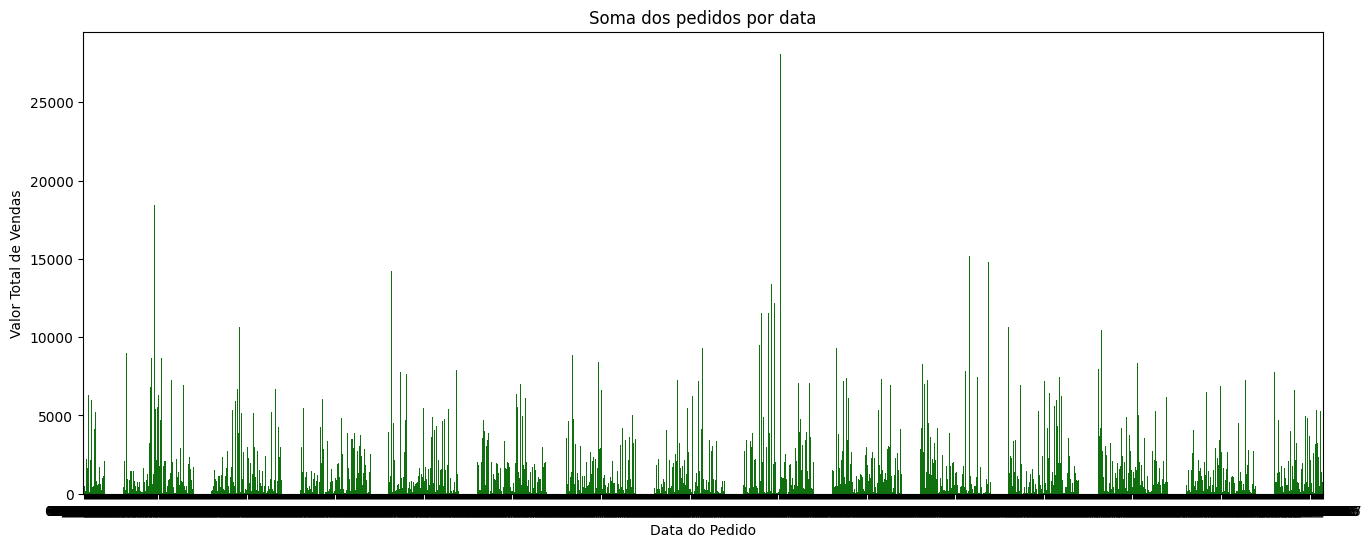

In [7]:
# Vendas x Data
vendas_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

plt.figure(figsize = (16, 6))
sns.barplot(data = vendas_data, x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Soma dos pedidos por data')
plt.xlabel('Data do Pedido')
plt.ylabel('Valor Total de Vendas')
plt.show()

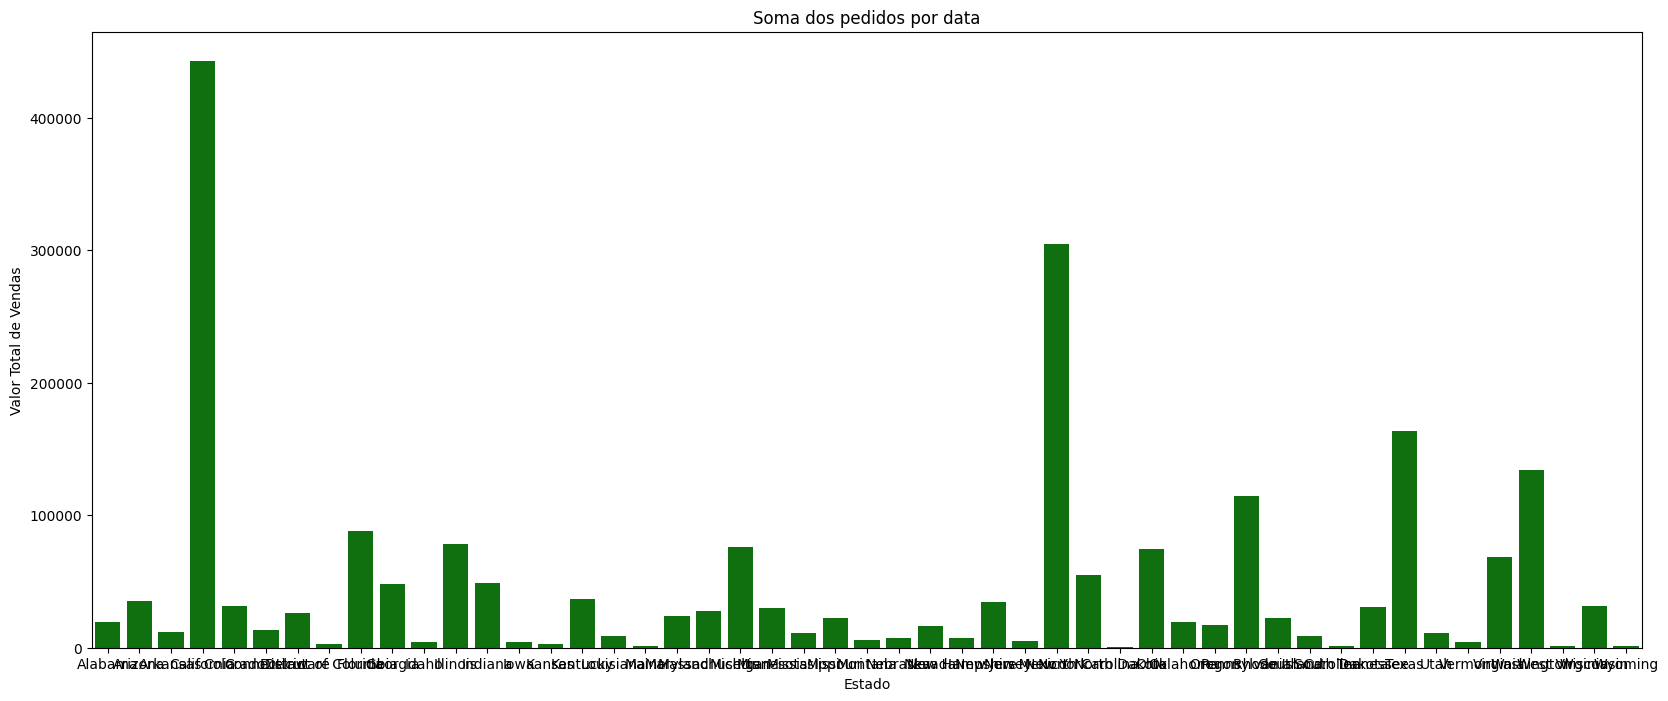

In [8]:
# Vendas x Estado
vendas_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

plt.figure(figsize = (20, 8))
sns.barplot(data = vendas_estado, x = 'Estado', y = 'Valor_Venda', color = 'green')
plt.title('Soma dos pedidos por data')
plt.xlabel('Estado')
plt.ylabel('Valor Total de Vendas')
plt.show()

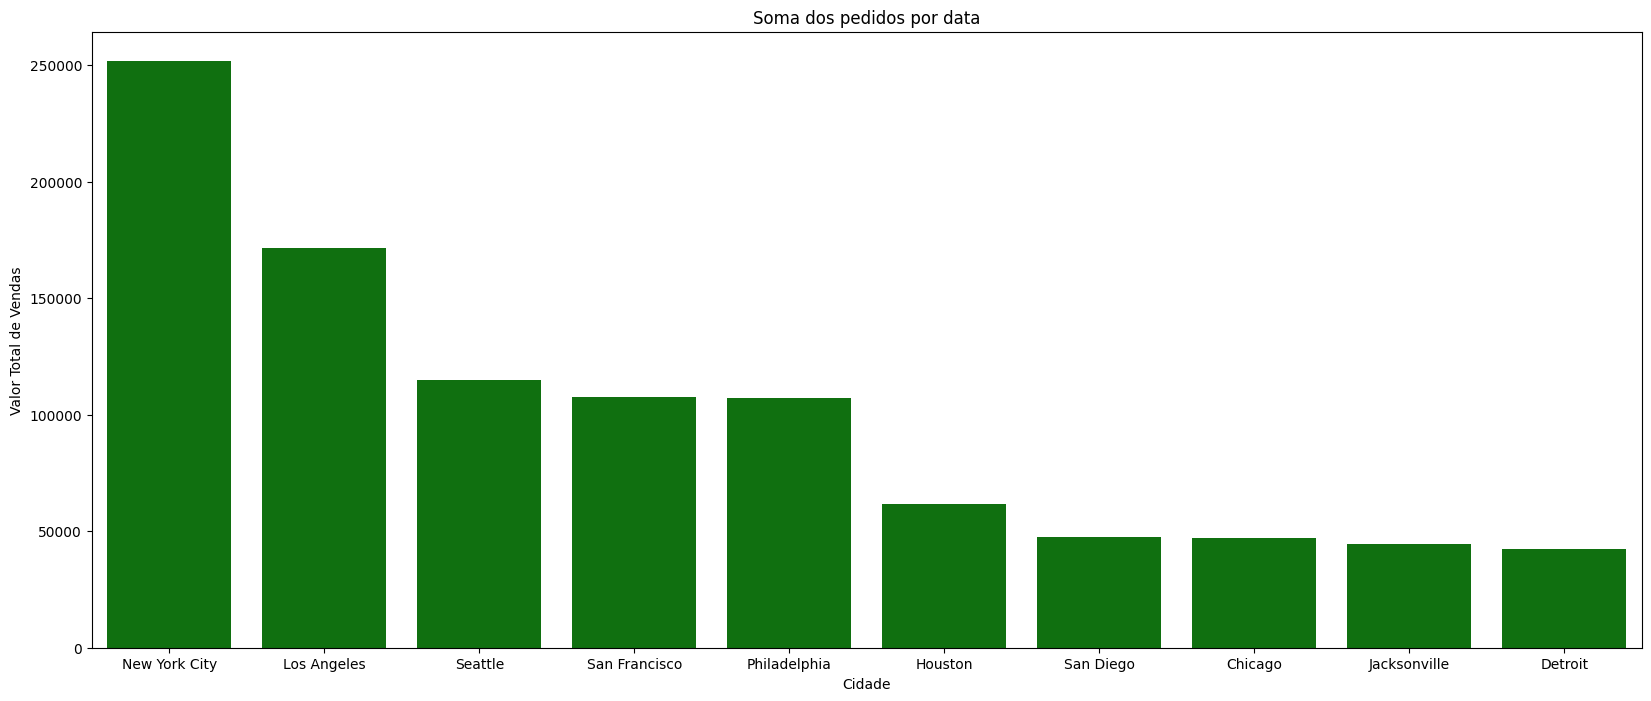

In [9]:
# Top 10 cidades com mais vendas
vendas_cidade = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index()
vendas_cidade = vendas_cidade.sort_values(by='Valor_Venda', ascending=False).head(10)

plt.figure(figsize = (20, 8))
sns.barplot(data = vendas_cidade, x = 'Cidade', y = 'Valor_Venda', color = 'green')
plt.title('Soma dos pedidos por data')
plt.xlabel('Cidade')
plt.ylabel('Valor Total de Vendas')
plt.show()

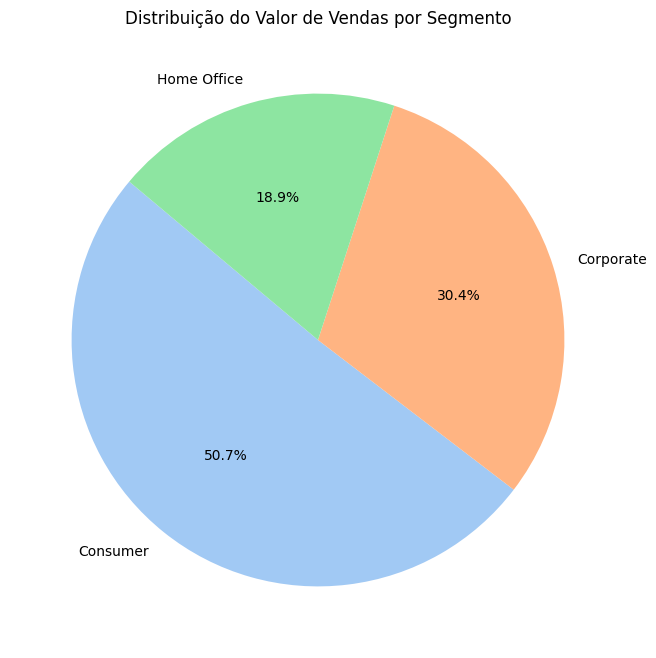

In [10]:
# Vendas por segmento

vendas_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum()

plt.figure(figsize=(10, 8))
plt.pie(vendas_segmento, labels=vendas_segmento.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição do Valor de Vendas por Segmento')
plt.xticks(rotation = 80)  
plt.show()

C:\Users\HENRIQUE\AppData\Local\Temp\ipykernel_24052\1114462820.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])


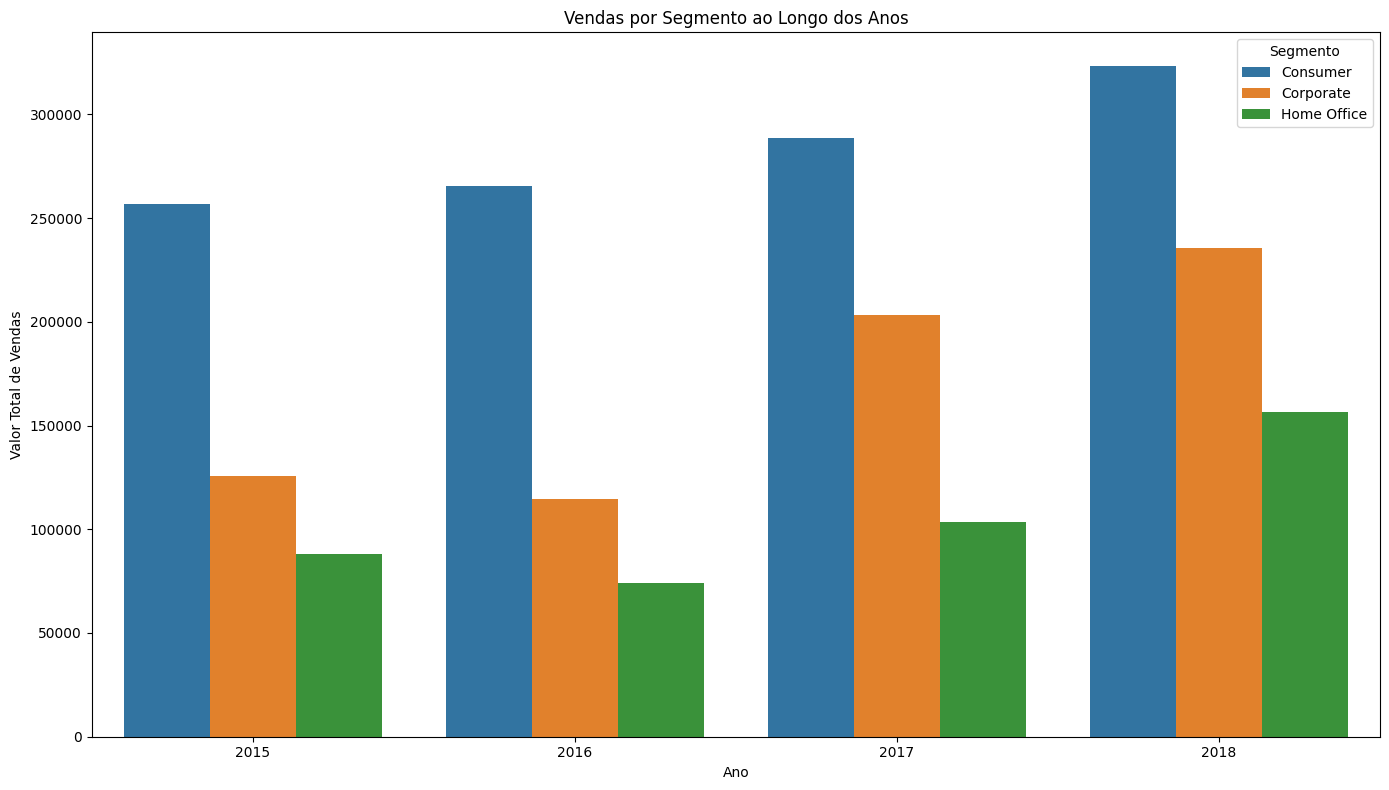

In [11]:
# Vendas x Segmento x Ano
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

vendas_segmento_ano = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=vendas_segmento_ano, x='Ano', y='Valor_Venda', hue='Segmento')
plt.title('Vendas por Segmento ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor Total de Vendas')
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

In [12]:
# Descontos condicionados
vendas_segmento_ano['Desconto'] = vendas_segmento_ano['Valor_Venda'].apply(lambda x: 0.15 if x > 1000 else 0.10)
vendas_segmento_ano['Valor_Final'] = vendas_segmento_ano['Valor_Venda'] * (1 - vendas_segmento_ano['Desconto'])

print(vendas_segmento_ano.head())

    Ano     Segmento  Valor_Venda  Desconto    Valor_Final
0  2015     Consumer  256719.9166      0.15  218211.929110
1  2015    Corporate  125819.5957      0.15  106946.656345
2  2015  Home Office   88229.0878      0.15   74994.724630
3  2016     Consumer  265295.2593      0.15  225500.970405
4  2016    Corporate  114643.1229      0.15   97446.654465


In [13]:
# Comparativo de descontos aplicados
media_antes = vendas_segmento_ano['Valor_Venda'].mean()

vendas_segmento_ano['Valor_Final'] = vendas_segmento_ano['Valor_Venda'] * 0.85

media_depois = vendas_segmento_ano['Valor_Final'].mean()

print("Média antes do desconto: R$", round(media_antes,2))
print("Média depois do desconto: R$", round(media_depois,2))

Média antes do desconto: R$ 186296.5
Média depois do desconto: R$ 158352.02
